SMap solves a locally weighted linear model for every prediction point. As mentioned in the documentation, the default solver is the LAPACK SVD solver dgelss, but can be replaced with a class object instantiated from the [sklearn.linear_model class](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

The intention of providing this option is so that users can use their own regularization parameters for constraining the linear fit. Supported solvers include [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression), [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge), [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso), [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet), [RidgeCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV), [LassoCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV), [ElasticNetCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html#sklearn.linear_model.ElasticNetCV).

Below we will evaluate each of the solvers on a toy dataset of points drawn from a circle.

In [1]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
import pyEDM

In [2]:
circle = pyEDM.sampleData['circle']

lmSolvers = {
    'SVD'          : None, 
    'Ridge'        : Ridge( alpha = 0.05 ),
    'Lasso'        : Lasso( alpha = 0.005 ),
    'ElasticNet'   : ElasticNet( alpha = 0.001, l1_ratio = 0.001 ),
    'RidgeCV'      : RidgeCV(),
    'LassoCV'      : LassoCV( cv = 5 ),
    'ElasticNetCV' : ElasticNetCV( l1_ratio = [.05,.1,.5,.7,.9,.95,1],
                                   cv = 5 )
}

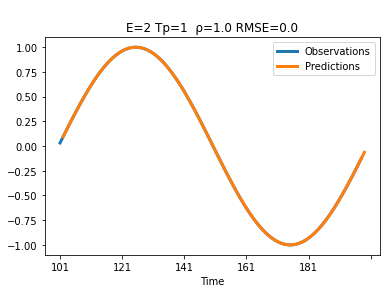

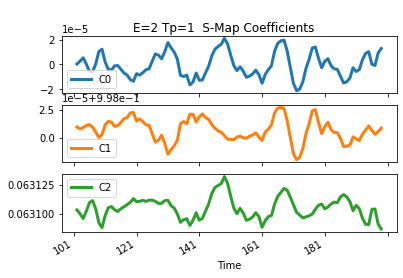

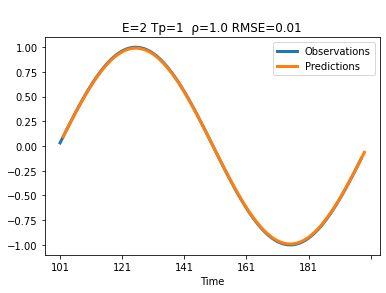

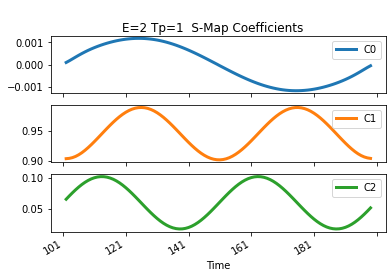

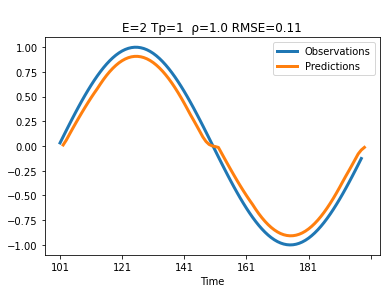

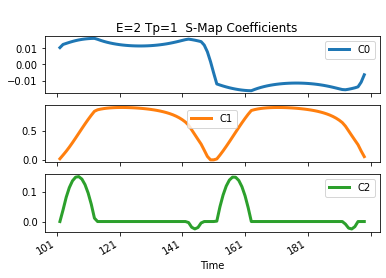

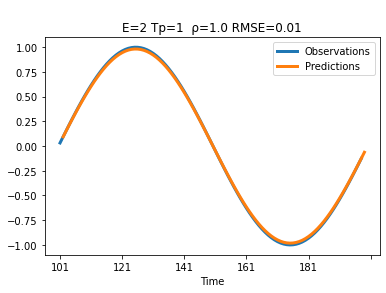

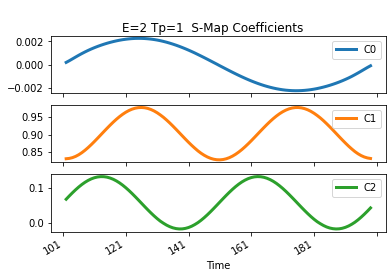

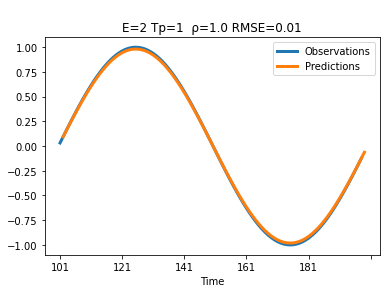

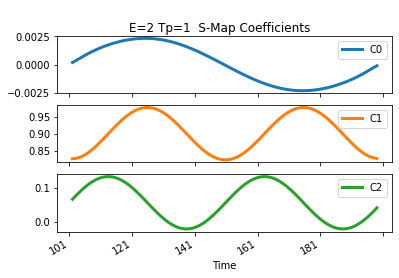

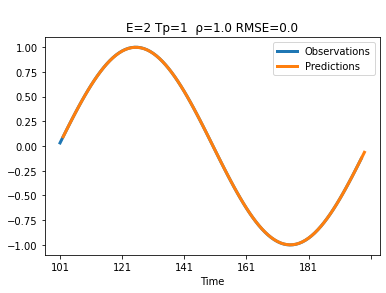

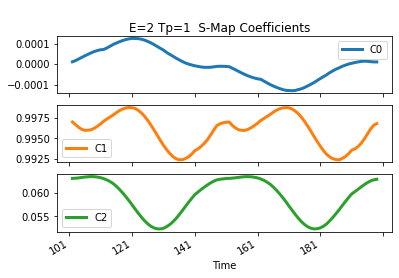

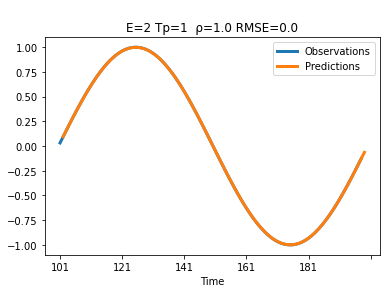

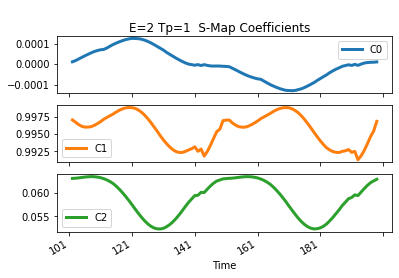

In [3]:
for solverName in lmSolvers.keys() :
    result = pyEDM.SMap( dataFrame = circle,
                         lib = "1 100", pred = "101 198",
                         embedded = True, E = 2, theta = 3.14,
                         columns = "x y", target = "x", showPlot = True,
                         solver = lmSolvers[ solverName ] )